C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Piyush\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


        Month  Forecasted_Sales    Lower_CI    Upper_CI
0  2025-02-01        189.543312   39.564069  339.522555
1  2025-03-01        220.065338   36.824019  403.306656
2  2025-04-01        172.813162  -25.029634  370.655958
3  2025-05-01        259.634625   54.715110  464.554139
4  2025-06-01        203.471967   -5.083109  412.027043
5  2025-07-01        217.597914    7.088721  428.107106
6  2025-08-01        267.373400   55.769147  478.977653
7  2025-09-01        266.241715   53.998872  478.484558
8  2025-10-01        274.852443   62.222896  487.481989
9  2025-11-01        260.071068   47.198884  472.943251
10 2025-12-01        387.678207  174.648381  600.708032
11 2026-01-01        380.928585  167.792336  594.064834
12 2026-02-01        307.971892   88.253450  527.690333
13 2026-03-01        345.231410  122.017598  568.445222
14 2026-04-01        244.196271   19.027727  469.364815
15 2026-05-01        310.560014   84.279918  536.840111
16 2026-06-01        238.405885   11.459332  465

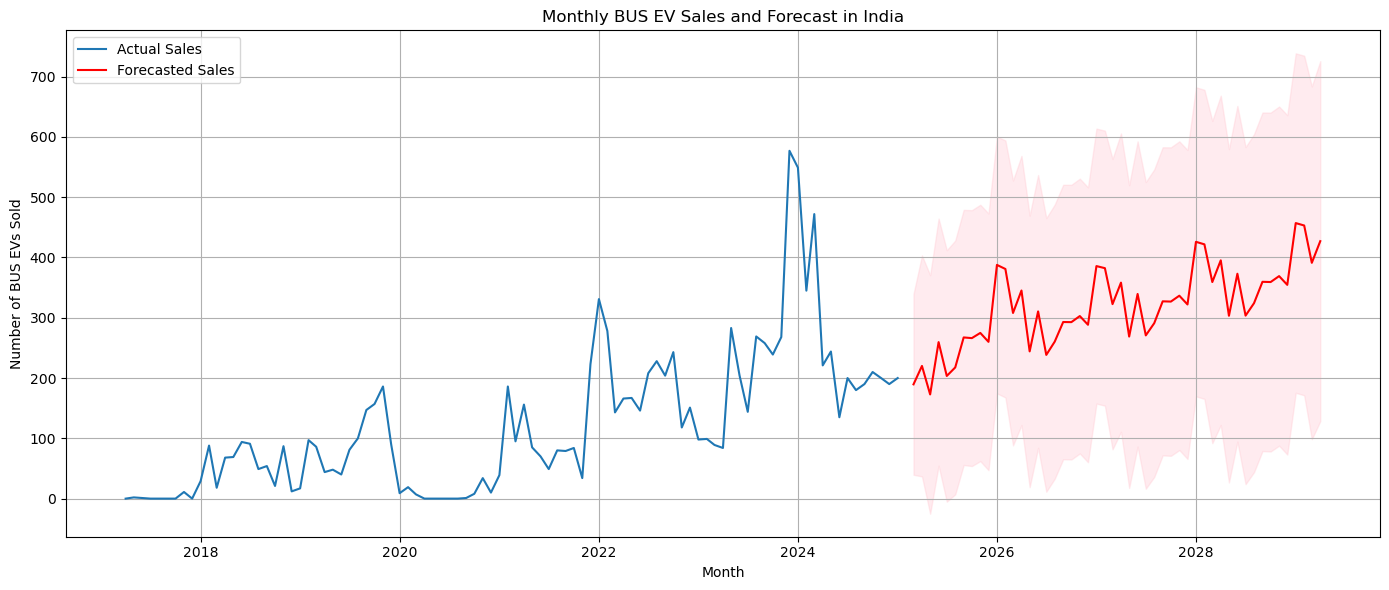

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data from Excel
file_path = 'Ev Sales.xlsx'
df = pd.read_excel(file_path, usecols=[0, 4])

# Clean column names
df.columns = ['Month', 'EV_Sales']

# Remove commas and convert to integer
df['EV_Sales'] = df['EV_Sales'].astype(str).str.replace(',', '').astype(int)

# Convert Month to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

# Fit SARIMA model — using seasonal_order with period=12 (monthly seasonality)
sarima_model = SARIMAX(df['EV_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))


sarima_result = sarima_model.fit(disp=False)

# Forecast next 12 months (or adjust steps)
forecast_steps = 50
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Forecast index starts after the last known month
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Extract forecast values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create forecast DataFrame
# Display forecast table
forecast_df = pd.DataFrame({
    'Month': forecast_values.index,
    'Forecasted_Sales': forecast_values.values,
    'Lower_CI': forecast_conf_int.iloc[:, 0].values,
    'Upper_CI': forecast_conf_int.iloc[:, 1].values
})
print(forecast_df)

# Plot actual vs forecasted
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['EV_Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly BUS EV Sales and Forecast in India')
plt.xlabel('Month')
plt.ylabel('Number of BUS EVs Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()